<a href="https://colab.research.google.com/github/Asim927/Task-8/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


In [2]:
df = pd.read_csv("bank-full.csv", sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Replace 'unknown' with mode for categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col].replace('unknown', df[col].mode()[0], inplace=True)


/tmp/ipython-input-1344556230.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('unknown', df[col].mode()[0], inplace=True)


In [5]:
label_encoder = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])


In [6]:
X = df.drop('y', axis=1)
y = df['y']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

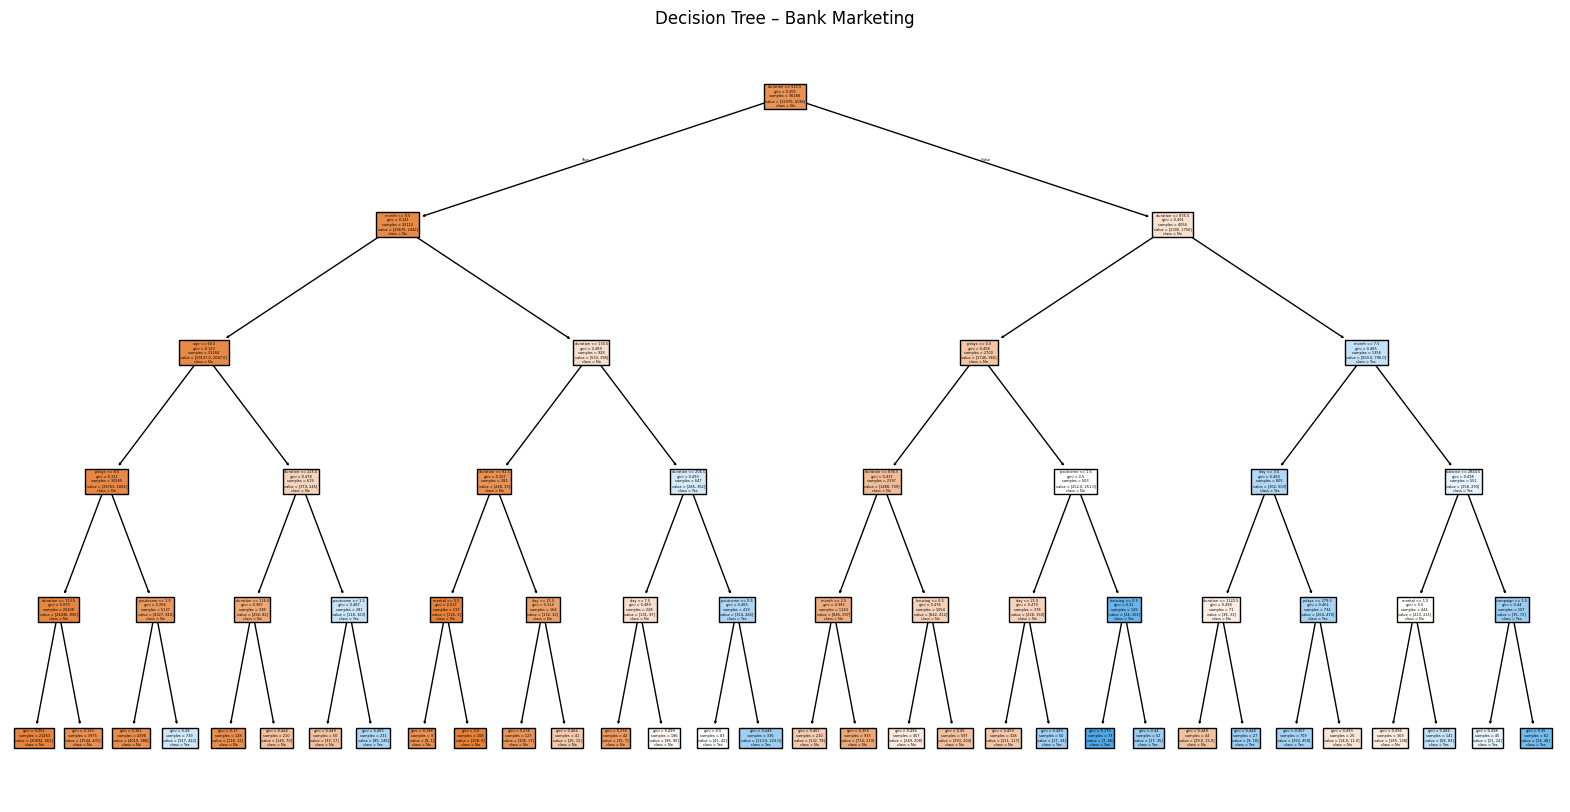

In [9]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True
)
plt.title("Decision Tree – Bank Marketing")
plt.show()


In [10]:
y_pred = model.predict(X_test)


In [11]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.60      0.35      0.44      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.66      0.69      9043
weighted avg       0.88      0.89      0.88      9043



In [12]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy :", test_accuracy)


Training Accuracy: 0.9019022340190224
Testing Accuracy : 0.8935087913303107


In [13]:
#1. Customers contacted for longer duration calls are more likely to subscribe.
#2. Previous successful campaign outcomes increase subscription probability.
#3. Customers with fewer campaign contacts show better response rates.
